<a href="https://colab.research.google.com/github/dookda/cmu_py499/blob/main/proj_jom_sam/sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**samgeo**

ติดตั้ง samgeo

pip install segment-geospatial leafmap

In [15]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

In [7]:
m = leafmap.Map(center=[18.803154, 98.9500612], zoom=19)
m.add_basemap("SATELLITE")
m

Map(center=[18.803154, 98.9500612], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [8]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
    print(bbox)
else:
    bbox = [-95.3704, 29.6762, -95.368, 29.6775]

In [13]:
image = os.path.join(os.getcwd(), 'img', 'satellite.tif')

In [10]:
get_basemaps().keys()

dict_keys(['BaseMapDE.Color', 'BaseMapDE.Grey', 'BasemapAT.basemap', 'BasemapAT.grau', 'BasemapAT.highdpi', 'BasemapAT.orthofoto', 'BasemapAT.overlay', 'BasemapAT.surface', 'BasemapAT.terrain', 'CartoDB.DarkMatter', 'CartoDB.DarkMatterNoLabels', 'CartoDB.DarkMatterOnlyLabels', 'CartoDB.Positron', 'CartoDB.PositronNoLabels', 'CartoDB.PositronOnlyLabels', 'CartoDB.Voyager', 'CartoDB.VoyagerLabelsUnder', 'CartoDB.VoyagerNoLabels', 'CartoDB.VoyagerOnlyLabels', 'CyclOSM', 'Esri.AntarcticBasemap', 'Esri.AntarcticImagery', 'Esri.ArcticImagery', 'Esri.ArcticOceanBase', 'Esri.ArcticOceanReference', 'Esri.DeLorme', 'Esri.NatGeoWorldMap', 'Esri.OceanBasemap', 'Esri.WorldGrayCanvas', 'Esri.WorldImagery', 'Esri.WorldPhysical', 'Esri.WorldShadedRelief', 'Esri.WorldStreetMap', 'Esri.WorldTerrain', 'Esri.WorldTopoMap', 'FreeMapSK', 'Gaode.Normal', 'Gaode.Satellite', 'GeoportailFrance.Acces_Biomethane', 'GeoportailFrance.Adminexpress_cog_2020', 'GeoportailFrance.Adminexpress_cog_Latest', 'GeoportailFra

install GDAL ให้เรียบร้อยก่อน 

ดู version ในเครื่อง  gdal-config --version

ติดตั้งเข้าไปใน python package pip install GDAL==<version_here>

In [14]:
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 01/40
Downloaded image 02/40
Downloaded image 03/40
Downloaded image 04/40
Downloaded image 05/40
Downloaded image 06/40
Downloaded image 07/40
Downloaded image 08/40
Downloaded image 09/40
Downloaded image 10/40
Downloaded image 11/40
Downloaded image 12/40
Downloaded image 13/40
Downloaded image 14/40
Downloaded image 15/40
Downloaded image 16/40
Downloaded image 17/40
Downloaded image 18/40
Downloaded image 19/40
Downloaded image 20/40
Downloaded image 21/40
Downloaded image 22/40
Downloaded image 23/40
Downloaded image 24/40
Downloaded image 25/40
Downloaded image 26/40
Downloaded image 27/40
Downloaded image 28/40
Downloaded image 29/40
Downloaded image 30/40
Downloaded image 31/40
Downloaded image 32/40
Downloaded image 33/40
Downloaded image 34/40
Downloaded image 35/40
Downloaded image 36/40
Downloaded image 37/40
Downloaded image 38/40
Downloaded image 39/40
Downloaded image 40/40
Saving GeoTIFF. Please wait...
Image saved to /Users/sakdahomhuan/Dev/cmu_py499/

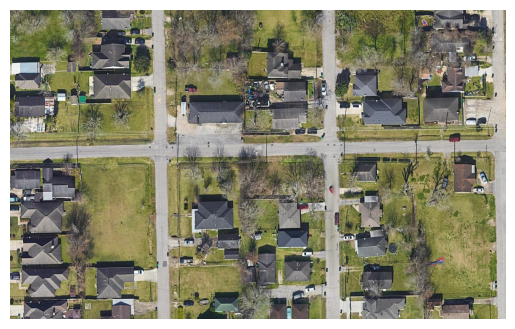

In [18]:
# image = '/path/to/your/own/image.tif'

image_path = os.path.join(os.getcwd(), 'img', 'satellite.tif')

img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

อันนี้ต้องใช้ xarray


pip install xarray

In [20]:
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

Map(center=[18.803154, 98.9500612], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Model https://github.com/facebookresearch/segment-anything/tree/main

- [sam_vit_h_4b8939.pth](https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth)

- [sam_vit_l_0b3195.pth](https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth)

- [sam_vit_b_01ec64.pth](https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth)

In [22]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

In [23]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

100%|██████████| 12/12 [33:20<00:00, 166.71s/it] 


In [24]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

In [ ]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

In [ ]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(vector, layer_name="Vector", style=style)
m